#  Práctica I: Support Vector Machines (SVM)

Asignatura: Técnicas Avanzadas de Análisis de Datos

Manuel Alexander Arzola Santos

El objetivo de esta práctica es el estudio del algoritmo Support Vector Machines, o Máquinas de Vector Soporte. Para ello lo aplicaremos sobre distintos conjuntos de datos:

- Conjunto de datos linealmente separables generado por nosotros.

- Conjunto de datos linealmente no separables generado por nosotros.

- Conjunto de datos real.

Sobre los conjunto de datos generados por nosotros aplicaremos el algoritmo con
distintas funciones Kernel, optimizando sus parámetros con la técnica GridSearch. Además, comprobaremos qué métricas ofrecen los modelos usando validación cruzada y sin usarla.

Por otra parte, haremos una comparativa del SVC (Support Vector Classifier, el modelo de clasificación basado en el algoritmo SVM) con otros dos algoritmos de clasificación diferentes, como son los árboles de clasificación y el método Naive-Bayes. Dicha comparativa la realizaremos sobre un conjunto de datos real, en este caso, un dataset que contiene datos físico-químicos de ciertos tipos de vino.

# Librerías y funciones

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
from matplotlib import pyplot
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn import tree
from sklearn.naive_bayes import GaussianNB

import multiprocessing

from imblearn.over_sampling import SMOTE

from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
colors = {1:'red', 0:'blue'}

# Generar conjuntos de datos

Para generar los conjuntos de datos he utilizado la función, de sklearn.datasets, make_blobs. Con ella puedo especificar número de puntos, de centros, etc. Ejecutando varias veces esta celda he obtenido diferentes nubes de puntos, las cuales he guardado en los archivos "taad1_lineal_sep.csv", que contiene los datos linealmente separables y "taad1_lineal_no_sep.csv", en el que se encuentran los no separables.

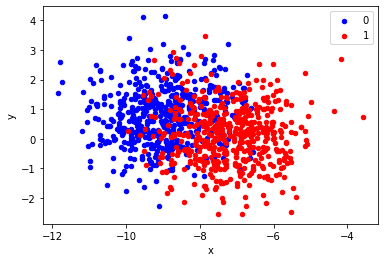

In [ ]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2)
# scatter plot, dots colored by class value
df1 = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
#colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df1.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [ ]:
df1.head()

,x,y,label
0,-8.836991,-5.938942,0
1,-8.022698,-5.312383,0
2,-7.079367,-5.592856,0
3,-9.194009,-4.280472,0
4,-3.661279,-4.995604,1


In [ ]:
df1.to_csv('/content/drive/MyDrive/TAAD - Técnicas avanzadas de análisis de datos/taad1_lineal_no_sep.csv')#, index = False)

# SVC con datos linealmente separables

In [ ]:
df_sep = pd.read_csv('/content/drive/MyDrive/TAAD - Técnicas avanzadas de análisis de datos/taad1_lineal_sep.csv', sep=",", index_col=[0])
df_sep.head()

,x,y,label
0,7.053143,-0.196635,1
1,8.238144,-0.719493,1
2,7.861637,-0.827313,1
3,4.679096,-2.105970,0
4,4.014832,-0.691269,0


Visualizamos los datos, y comprobamos que son linealmente separables, por poco margen.

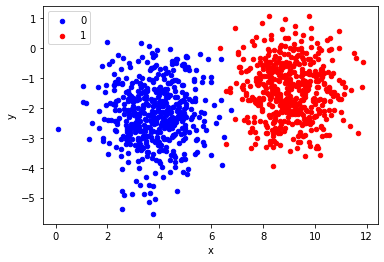

In [ ]:
#colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df_sep.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [ ]:
X_sep = df_sep.drop('label', axis=1)
y_sep = df_sep['label']

X_train, X_test, y_train, y_test = train_test_split(X_sep, 
                                                    y_sep,
                                                    test_size=0.3, 
                                                    random_state=42)

## Simple

Para esta primera prueba, aplico el algoritmo a los datos usando el kernel "linear", empleando todo el conjunto para entrenar el modelo.

In [ ]:
svc1 = SVC(kernel='linear')
svc1.fit(X_sep, y_sep)

SVC(kernel='linear')

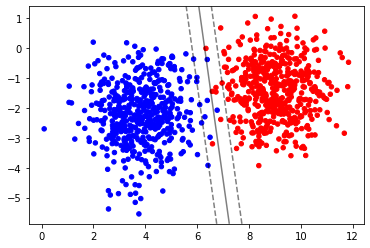

In [ ]:
plt.scatter(X_sep.iloc[:, 0], X_sep.iloc[:, 1], c=y_sep, s=20, cmap='bwr')
plot_svc_decision_function(svc1);

In [ ]:
y_pred = svc1.predict(X_sep)

accuracy = accuracy_score(y_sep, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.70%


Confusion matrix:
 [[498   2]
 [  1 499]]


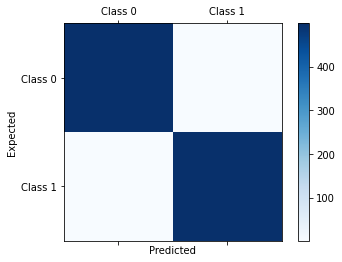

In [ ]:
conf_mat = confusion_matrix(y_true=y_sep, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

Como podemos ver, la clasificación es casi perfecta, teniendo un accuracy del 99.70%

## Usando GridSearchCV

En este caso usaré GridSearchCV para entrenar el modelo usando diferentes valores de C y gamma, así como varios tipos de kernel. De esta forma, hallaremos los hiperparámetros idóneos para el modelo.

In [ ]:
param_grid = {
  'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
  'C': [0.1, 1, 10, 100, 1000], 
  #'gamma': ('auto', 'scale')
  'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
 }

In [ ]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_sep, y_sep)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.995 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.995 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.995 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.995 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.995 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.995 total time=   0.1s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=pol

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=0.1, gamma=1, kernel='linear')


Podemos observar que los hiperparámetros óptimos para el clasificador son:

- C = 0.1
- gamma = 1

El kernel más adecuado es "linear", lo cual nos lleva a pensar que posiblemente el accuracy no va a mejorar con respecto al caso anterior, ya que no habrá un cambio de dimensionalidad en el modelo.

In [ ]:
modelo = grid.best_estimator_

In [ ]:
grid_predictions = modelo.predict(X_sep) 
  
# print classification report 
print("Accuracy: %.2f%%" % (modelo.score(X_sep, y_sep) * 100.0)) #grid.score(X_test, y_test)*100)
print(confusion_matrix(y_sep, grid_predictions))
print(classification_report(y_sep, grid_predictions)) 

Accuracy: 99.70%
[[498   2]
 [  1 499]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



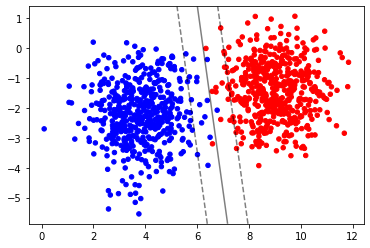

In [ ]:
plt.scatter(X_sep.iloc[:, 0], X_sep.iloc[:, 1], c=y_sep, s=20, cmap='bwr')
plot_svc_decision_function(modelo);

Confusion matrix:
 [[498   2]
 [  1 499]]


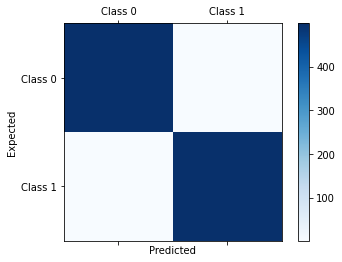

In [ ]:
conf_mat = confusion_matrix(y_true=y_sep, y_pred=grid_predictions)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

Tal y como habíamos supuesto, el accuracy se mantiene igual que en el caso anterior, es decir, igual a 99.70%.





# SVC con datos linealmente no separables

Para el caso de los datos linealmente no separables, primero probaré usando todo el conjunto de datos para entrenar el modelo. Luego, usando validación cruzada y dos kernel al azar, el lineal y el sigmoide. Para finalizar, hallaré los hiperparámetros óptimos para el SVC mediante GridSearchCV.

In [ ]:
df_no_sep = pd.read_csv('/content/drive/MyDrive/TAAD - Técnicas avanzadas de análisis de datos/taad1_lineal_no_sep.csv', sep=",", index_col=[0])
df_no_sep.head()

,x,y,label
0,-8.836991,-5.938942,0
1,-8.022698,-5.312383,0
2,-7.079367,-5.592856,0
3,-9.194009,-4.280472,0
4,-3.661279,-4.995604,1


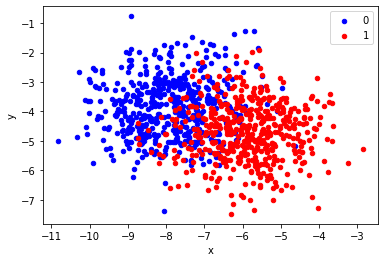

In [ ]:
#colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df_no_sep.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

Como puede apreciarse, los datos no son linealmente separables.

In [ ]:
X_no_sep = df_no_sep.drop('label', axis=1)
y_no_sep = df_no_sep['label']

X_train, X_test, y_train, y_test = train_test_split(X_no_sep, 
                                                    y_no_sep,
                                                    test_size=0.3, 
                                                    random_state=42)

## Simple

Empleamos el algoritmo usando todo el conjunto de datos y el kernel "linear".

In [ ]:
svc3 = SVC(kernel='linear')
svc3.fit(X_no_sep, y_no_sep)

SVC(kernel='linear')

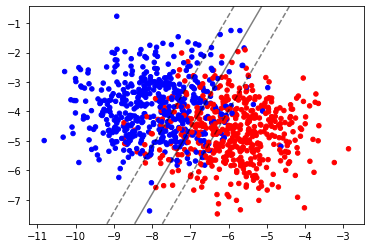

In [ ]:
plt.scatter(X_no_sep.iloc[:, 0], X_no_sep.iloc[:, 1], c=y_no_sep, s=20, cmap='bwr')
plot_svc_decision_function(svc3);

In [ ]:
y_pred = svc3.predict(X_no_sep)

accuracy = accuracy_score(y_no_sep, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.40%


Confusion matrix:
 [[437  63]
 [ 73 427]]


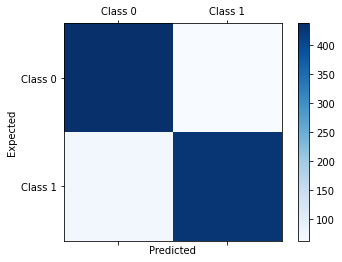

In [ ]:
conf_mat = confusion_matrix(y_true=y_no_sep, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

Hace una clasificación nada mala, consiguiendo un accuracy del 86.40%.

## Usando validación cruzada (kernel = linear)

In [ ]:
svc4 = SVC(kernel='linear')
svc4.fit(X_train, y_train)

y_pred = svc4.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 87.33%


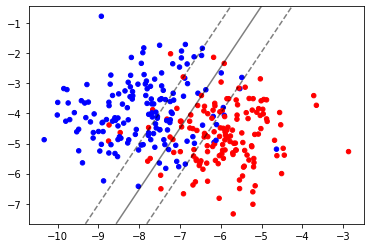

In [ ]:
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, s=20, cmap='bwr')
plot_svc_decision_function(svc4);

Confusion matrix:
 [[132  22]
 [ 16 130]]


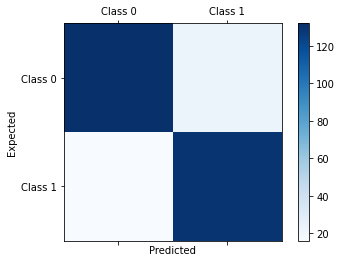

In [ ]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

En este caso, gracias a la validación cruzada, vemos que la clasificación realizada mejora ligeramente.

## Usando validación cruzada (kernel = sigmoid)

In [ ]:
svc4 = SVC(kernel='sigmoid')
svc4.fit(X_train, y_train)

y_pred = svc4.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 48.67%


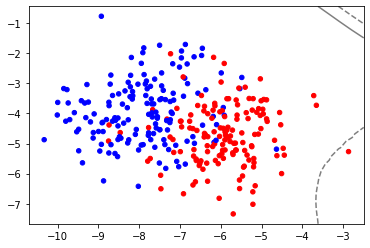

In [ ]:
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, s=20, cmap='bwr')
plot_svc_decision_function(svc4);

Confusion matrix:
 [[130  24]
 [ 12 134]]


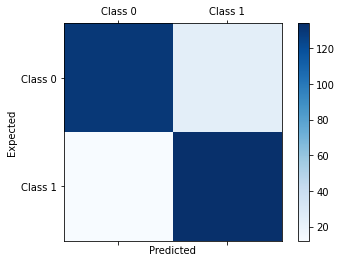

In [ ]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

En este caso, los resultados han empeorado notablemente, ya que hemos elegido un kernel que no es apropiado para este conjunto de datos.

## Usando cv y GridSearchCV

In [ ]:
param_grid = {
  'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
  'C': [0.1, 1, 10, 100, 1000], 
  #'gamma': ('auto', 'scale')
  'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
 }

In [ ]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.864 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.821 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.871 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.900 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.843 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.886 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.836 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.850 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.886 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.836 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.850 total time=   0.4s
[CV 2/5] END .......C=0.1, gamma=1, kernel=pol

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, gamma=0.01)


Podemos observar que los hiperparámetros óptimos para el clasificador son:

- C = 100
- gamma = 0.01

El kernel más adecuado es "rbf", el gaussiano, que no hemos probado para estos datos, por lo que se prevé que la eficacia del clasificador sea mayor que las obtenidas hasta ahora.

In [ ]:
modelo = grid.best_estimator_

In [ ]:
grid_predictions = modelo.predict(X_test) 
  
# print classification report 
print("Accuracy: %.2f%%" % (modelo.score(X_test, y_test) * 100.0))
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions)) 

Accuracy: 87.00%
[[134  20]
 [ 19 127]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       154
           1       0.86      0.87      0.87       146

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



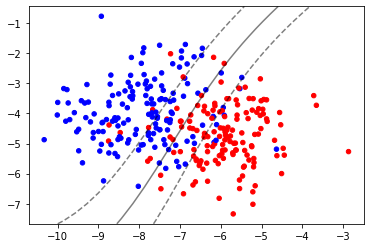

In [ ]:
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, s=20, cmap='bwr')
plot_svc_decision_function(modelo);

Tal y como habíamos vaticinado, la búsqueda de los hiperparámetros óptimos nos permite obtener el mejor clasificador, aunque tenga una eficiencia superior por un escaso margen.

# SVC con dataset real

Como último estudio haremos una comparativa del SVC con otros dos algoritmos de clasificación: los árboles de clasificación y el método Naive-Bayes. 

Dicha comparativa la realizaremos sobre un conjunto de datos real, en este caso, un dataset que contiene datos físico-químicos de ciertos tipos de vino.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Preprocesado_2122/data/winequality.csv', sep=",")
col_names = list(df.columns)
num_names = list(col_names[0:12])
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Preprocesado

Antes de entrenar los diferentes modelos hemos de realizar el paso previo del preprocesado, a fin de que la modelización sea óptima.

### Valores perdidos

Este es un paso clave en la limpieza de datos, ya que los datos en bruto generalmente suelen incluir errores o datos faltantes, los cuales afectarían negativamente a la hora de obtener los modelos.

Para ello, ejecutamos la siguiente celda, que cuenta los valores perdidos de cada variable y almacena el nombre de cada variable que contenga valores perdidos en una lista.

In [ ]:
var_perdidas = []
for i in df.columns:
    nas = sum(df[i].isnull())
    if nas>0:
        var_perdidas.append(i)
        print(i," ", nas)

fixed acidity   10
volatile acidity   8
citric acid   3
residual sugar   2
chlorides   2
pH   9
sulphates   4


Usando la lista de variables que hemos obtenido previamente y una función lambda, hacemos una imputación de casos similares para los valores faltantes:

In [ ]:
for elem in var_perdidas:
  df[elem]=df.groupby(['type','quality'])[elem].apply(lambda x:x.fillna(x.mean()))

Como podemos ver, ya no hay valores perdidos.

In [ ]:
df.isna().sum().sort_values()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Balanceo del dataset

Si el dataset estuviera desbalanceado, esto es, que una de las clases fuese minoritaria con respecto a la otra, el algoritmo con mucha más frecuencia categorizaría las instancias como pertenecientes a la clase mayoritaria, ya que así el índice de acierto sería mucho mayor. Esto es un error, ya que no clasificaríamos correctamente a la clase minoritaria.

Antes de visualizar la distribución de la variable de clase, hemos de realizar algunos pasos previos.

Por una parte, la variable "type" presenta los valores "white" y "red", a los que otorgaremos el valor de "0" y "1" respectivamente, para que tengan valor numérico.

Por otra parte, el atributo de clase es multiclase, por lo que se ha de reducir de forma que sea binario. Ya que esta variable expresa la calificación del vino en una escala de 1 a 10, estableceré que en el rango de 0 a 5, "quality" valga "0", y si es superior a 5, valga "1".

In [ ]:
df.quality.replace(range(0,5),0, inplace=True)
df.quality.replace(range(5,10),1, inplace=True)
df['type'].replace('white',0, inplace=True)
df['type'].replace('red',1, inplace=True)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


Visualizamos la distribución de "quality" para comprobar si es necesario el remuestreo:

quality
0     246
1    6251
dtype: int64

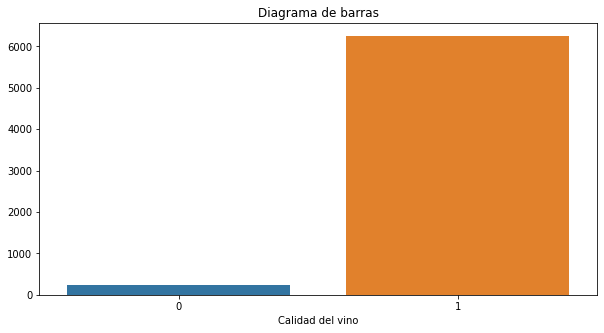

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='quality', data=df)
plt.xticks(rotation= 0)
plt.xlabel('Calidad del vino')
plt.ylabel('')
plt.title('Diagrama de barras')
df.groupby('quality').size()

Para realizar el remuestreo usaremos la técnica SMOTE (Técnica de sobremuestreo de minoría sintética), que consiste en sintetizar elementos para la clase minoritaria basados en elementos ya existentes. Funciona al azar seleccionando un punto de la clase minoritaria y calculando los k-vecinos más cercanos para este punto. Los puntos sintéticos se agregan entre el punto elegido y sus  vecinos.

In [ ]:
X = df.drop(columns = 'quality')
y = df['quality']  

In [ ]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

### Normalización

La normalización es una operación de preprocesado especialmente útil para algoritmos de clasificación que involucren métodos basados en distancias. Como conviene que los valores sean cercanos entre sí de cara a aplicar el SVC, aplicaremos la normalización Z-score, en la cual restamos la media a cada valor y dividimos entre la desviación típica.

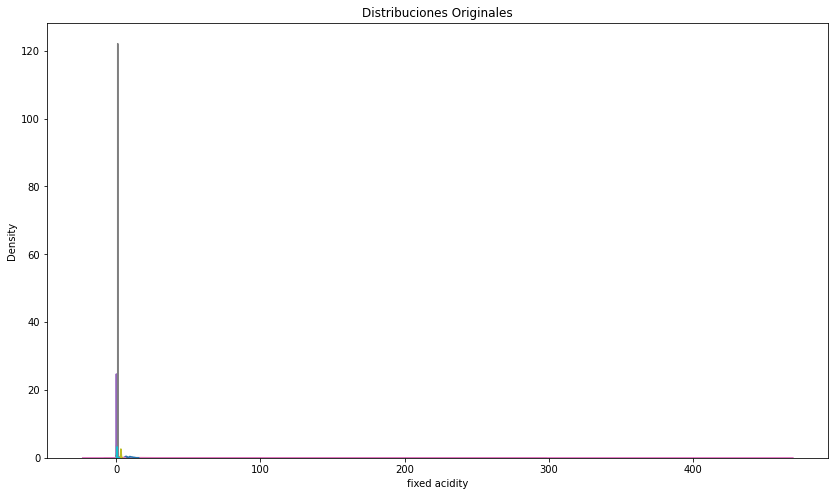

In [ ]:
fig, (ax0) = plt.subplots(ncols=1, figsize=(14, 8))
ax0.set_title('Distribuciones Originales')

sns.kdeplot(df['fixed acidity'], ax=ax0)
sns.kdeplot(df['volatile acidity'], ax=ax0)
sns.kdeplot(df['citric acid'], ax=ax0)
sns.kdeplot(df['residual sugar'], ax=ax0)
sns.kdeplot(df['chlorides'], ax=ax0)
sns.kdeplot(df['free sulfur dioxide'], ax=ax0)
sns.kdeplot(df['total sulfur dioxide'], ax=ax0)
sns.kdeplot(df['density'], ax=ax0)
sns.kdeplot(df['pH'], ax=ax0)
sns.kdeplot(df['sulphates'], ax=ax0)
sns.kdeplot(df['alcohol'], ax=ax0)

In [ ]:
s_scaler = preprocessing.StandardScaler()

df_final = s_scaler.fit_transform(X_sm)

df_final = pd.DataFrame(df_final, columns=num_names)

In [ ]:
df_final['quality']= y_sm

### Separación entre conjuntos de entrenamiento y validación

In [ ]:
X_final = df_final.drop('quality', axis=1)
y_final = df_final['quality']


X_train, X_test, y_train, y_test = train_test_split(X_final, 
                                                    y_final,
                                                    test_size=0.3, 
                                                    random_state=42)

### Visualización de los resultados

#### Valores perdidos

In [ ]:
df.isna().sum().sort_values()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Normalización

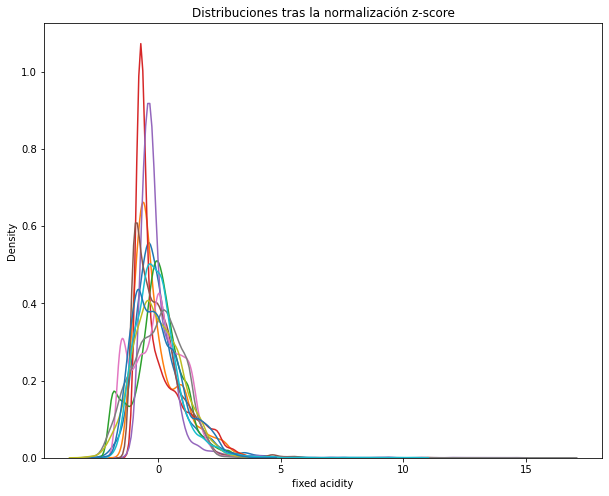

In [ ]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Distribuciones tras la normalización z-score')

sns.kdeplot(df_final['fixed acidity'], ax=ax1)
sns.kdeplot(df_final['volatile acidity'], ax=ax1)
sns.kdeplot(df_final['citric acid'], ax=ax1)
sns.kdeplot(df_final['residual sugar'], ax=ax1)
sns.kdeplot(df_final['chlorides'], ax=ax1)
sns.kdeplot(df_final['free sulfur dioxide'], ax=ax1)
sns.kdeplot(df_final['total sulfur dioxide'], ax=ax1)
sns.kdeplot(df_final['density'], ax=ax1)
sns.kdeplot(df_final['pH'], ax=ax1)
sns.kdeplot(df_final['sulphates'], ax=ax1)
sns.kdeplot(df_final['alcohol'], ax=ax1)

#### Balanceo del dataset

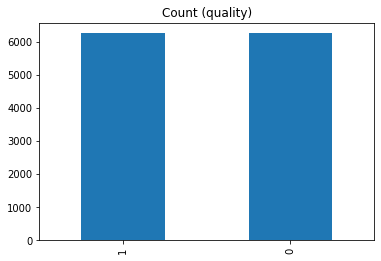

In [ ]:
df_final.quality.value_counts().plot(kind='bar', 
                                     title='Count (quality)');

Observamos que ambas clases cuentan con el mismo número de instancias.

#### ¿Los datos son linealmente separables?

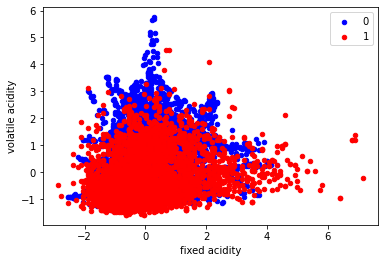

In [ ]:
fig, ax = pyplot.subplots()
grouped = df_final.groupby('quality')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='fixed acidity', y='volatile acidity', label=key, color=colors[key])
pyplot.show()

A simple vista podemos ver que no se trata de un conjunto de datos linealmente separable.

## Árbol de clasificación

In [ ]:
DT = tree.DecisionTreeClassifier()

DT.fit(X_train, y_train)

predictions = DT.predict(X_test)

print(DT.score(X_test, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, DT.predict(X_test)))

0.9346840842442016
[[1713  104]
 [ 141 1793]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1817
           1       0.95      0.93      0.94      1934

    accuracy                           0.93      3751
   macro avg       0.93      0.93      0.93      3751
weighted avg       0.93      0.93      0.93      3751



Se obtiene un buen desempeño, con un accuracy del 93,47%.

## Naive-Bayes

In [ ]:
NB = GaussianNB()

NB.fit(X_train, y_train)

predictions = NB.predict(X_test)

print(NB.score(X_test, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, NB.predict(X_test)))

0.7003465742468675
[[1125  692]
 [ 432 1502]]
              precision    recall  f1-score   support

           0       0.72      0.62      0.67      1817
           1       0.68      0.78      0.73      1934

    accuracy                           0.70      3751
   macro avg       0.70      0.70      0.70      3751
weighted avg       0.70      0.70      0.70      3751



En este caso el modelo lo ha hecho bastante mal en comparación al algoritmo anterior, con tan sólo un 70% de aciertos al clasificar.

## SVC

In [ ]:
param_grid = {
  'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
  'C': [0.1, 1, 10, 100, 1000], 
  'gamma': ('auto', 'scale')
  #'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
 }

In [ ]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.755 total time=   1.8s
[CV 2/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.759 total time=   1.8s
[CV 3/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.753 total time=   1.7s
[CV 4/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.761 total time=   1.8s
[CV 5/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.759 total time=   1.8s
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.826 total time=   2.5s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.817 total time=   2.6s
[CV 3/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.823 total time=   2.6s
[CV 4/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.835 total time=   2.6s
[CV 5/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.827 total time=   2.6s
[CV 1/5] END ....C=0.1, gamma=auto, kernel=poly;, score=0.786 total time=   2.0s
[CV 2/5] END ....C=0.1, gamma=auto, kernel=poly

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ('auto', 'scale'),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             verbose=3)

In [ ]:
print(grid.best_params_)

print(grid.best_estimator_)

{'C': 1000, 'gamma': 'auto', 'kernel': 'rbf'}
SVC(C=1000, gamma='auto')


In [ ]:
modelo = grid.best_estimator_

In [ ]:
grid_predictions = modelo.predict(X_test) 
  
print("Accuracy: %.2f%%" % (modelo.score(X_test, y_test) * 100.0)) #grid.score(X_test, y_test)*100)
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions)) 

Accuracy: 96.24%
[[1784   33]
 [ 108 1826]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1817
           1       0.98      0.94      0.96      1934

    accuracy                           0.96      3751
   macro avg       0.96      0.96      0.96      3751
weighted avg       0.96      0.96      0.96      3751



Con un accuracy del 96.24%, este resulta ser el mejor modelo de los estudiados.

# Conclusiones

Las conclusiones principales son las siguientes:

- Es muy importante comprobar primero de forma visual si los datos son linealmente separables o no, ya que, como pudo observarse en el caso del conjunto linealmente separable, usando el kernel "linear" sin ajustar los hiperparámetros se consiguió un accuracy igual de bueno que ajustándolos mediante GridSearchCV. Dicha comprobación visual es rápida de hacer y nos puede evitar tiempo en realizar la validación cruzada para el ajuste.

- Como se ha podido ver en el caso del segundo conjunto, es de vital importancia, si el conjunto de datos es linealmente no separable, usar una función que nos pueda proporcionar los mejores hiperparámetros del modelo. En caso contrario, rara vez llegaríamos a la combinación correcta, aparte de la pérdida de tiempo que conllevaría hacer todas las pruebas por separado.

- Por último, la eficacia del SVC como modelo ha quedado probada, ya que ha sido el que mejores resultados obtuvo de los 3, con una eficacia del 96.24%, seguido del árbol de decisión, con un 93%, y el modelo Naive-Bayes, con un 70%.

